# Ejercicio de Regresión Lineal

## Contexto del Ejercicio

Una empresa ha proporcionado datos sobre sus inversiones y ventas obtenidas desde el año 1980 hasta el año 2017, en millones de euros. El objetivo de este ejercicio es ajustar un modelo de regresión lineal para predecir las ventas en función de las inversiones. Además, se nos solicita predecir las ventas para una inversión específica de 7 millones de euros y evaluar el modelo utilizando la Suma de Cuadrados del Error (SCE) y el coeficiente de determinación \( R^2 \).


###  Paso 1: Carga de Datos y Exploración Inicial


In [29]:
# Importar la biblioteca pandas para la manipulación de datos
import pandas as pd
# Importamos las bibliotecas necesarias para el análisis
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Importamos las funciones para calcular las métricas de evaluación
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats

In [34]:
# Cargar los datos desde el archivo CSV
datos = pd.read_csv('datos_ventas.csv',sep=';',decimal=',')

In [35]:
# Visualizar las primeras filas del df para explorar su contenido
datos.head()

,Fecha_anual,Inversion,Ventas
0,1980,1.0,4.61
1,1981,1.5,5.18
2,1982,2.0,5.09
3,1983,2.5,5.44
4,1984,3.0,0.62


**Explicación del código:** En este primer paso, cargamos las librerias necesarias para el trabajo y la biblioteca pandas para cargar los datos desde un archivo CSV. Luego visualizamos las primeras filas del DataFrame para entender su estructura.

### Paso 2: Ajuste del Modelo de Regresión Lineal


In [ ]:
# Se define las variables independiente (X) y dependiente (Y)
# X contiene las inversiones e Y las ventas
X = datos[['Inversion']]
Y = datos['Ventas']

# Modelo de regresión lineal
modelo = LinearRegression()

# Ajuste del modelo a los datos
modelo.fit(X, Y)

# Parámetros del modelo: intercepto y coeficiente
intercepto = modelo.intercept_
coeficiente = modelo.coef_[0]

# Mostramos los parámetros del modelo
print(f"Intercepto: {intercepto}")
print(f"Coeficiente: {coeficiente}")

Intercepto: 2.8805285042127133
Coeficiente: 0.7426698763540869


#### **Interpretación de Resultados**

El modelo de regresión lineal ajustado tiene la fórmula:

$$Ventas = 2.88 + 0.74 \times Inversión$$

* **Intercepto: 2.88**

Representa las ventas esperadas cuando la inversión es cero. En este contexto, indica que si no se realiza ninguna inversión, las ventas previstas son de 2.88 millones de euros.

* **Coeficiente: 0.74**

Indica que por cada millón de euros adicional invertido, se espera un aumento de 0.74 millones de euros en las ventas.




**Interpretación del código:** En este paso, definimos las variables independientes y dependientes. Luego, utilizamos LinearRegression de sklearn para ajustar el modelo de regresión lineal a los datos y obtenemos los parámetros del modelo, que son el intercepto y el coeficiente.

### Paso 3: Predicción de Ventas

#### ¿Cuántas ventas se obtendrían si se invirtiesen 7 millones de euros?

In [38]:
# Utilizamos el modelo ajustado para predecir las ventas correspondientes a la nueva inversión
ventas_predichas = modelo.predict([[7]])

# Mostramos las ventas predichas
ventas_predichas

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.07921764])

#### **Interpretación de Resultados**

Para una inversión de 7 millones de euros, el modelo predice que las ventas serían aproximadamente 8.08 millones de euros.

**Interpretación código:** Definimos una nueva inversión de 7 millones de euros, y se utiliza el modelo ajustado para predecir las ventas correspondientes a esa inversión con la función predict().


### Paso 4: Evaluación del Modelo

In [ ]:
# Generamos las predicciones del modelo para los datos originales
predicciones = modelo.predict(X)
#pd.concat([pd.Series(Y,name='Ventas Reales'),pd.Series(predicciones,name='Ventas Predichas')],axis=1)
# Calculamos la Suma de Cuadrados del Error (SCE)
# Calculo del SCE
SCE = mean_squared_error(Y, predicciones)

# Calculamos el coeficiente de determinación (R^2)
R2 = r2_score(Y, predicciones)

# Mostramos las métricas de evaluación
print(f"Suma de Cuadrados del Error (SCE): {SCE}")
print(f"Coeficiente de Determinación (R^2): {R2}")

Suma de Cuadrados del Error (SCE): 1.550718117264932
Coeficiente de Determinación (R^2): 0.9144759177150086


#### **Interpretación de Resultados**

* Suma de Cuadrados del Error **(SCE) (1.55)**: Este valor indica la suma total de las diferencias al cuadrado entre las ventas reales y las predichas por el modelo. Un valor más bajo indica un mejor ajuste del modelo. En este caso, 1.55 es un valor  bajo en comparación con el rango de las ventas (0.62 a 17.45 millones de euros).

* Coeficiente de Determinación ($R^2$) (**0.91**): Este valor indica la proporción de la variabilidad de las ventas que es explicada por las inversiones en el modelo. Un valor de ($R^2$) cercano a 1 indica un buen ajuste del modelo. En este caso, 0.91 sugiere que el modelo explica el 91% de la variabilidad en las ventas, lo que indica un ajuste muy bueno.

**Interpretación código:** Se importa mean_squared_error y r2_score de sklearn.metrics para calcular las métricas de evaluación del modelo.Luego se genera las predicciones del modelo para los datos originales.
Suma de Cuadrados del Error (SCE) multiplicando el error cuadrático medio (MSE) por el número de observaciones.
Calculamos el coeficiente de determinación para evaluar qué tan bien se ajusta el modelo a los datos.Mostramos las métricas de evaluación para interpretar el desempeño del modelo.

## Anexo

### **Gráfico de dispersión con la línea de regresión**

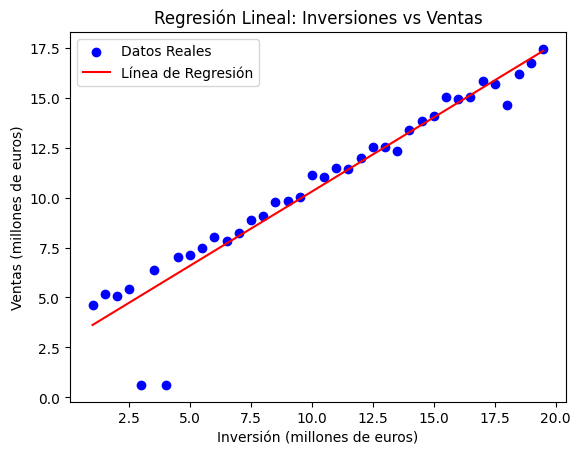

In [ ]:
plt.scatter(X, Y, color='blue', label='Datos Reales')
plt.plot(X, modelo.predict(X), color='red', label='Línea de Regresión')
plt.xlabel('Inversión (millones de euros)')
plt.ylabel('Ventas (millones de euros)')
plt.title('Regresión Lineal: Inversiones vs Ventas')
plt.legend()
plt.show()

La dispersión de los puntos alrededor de la línea de regresión sugiere una relación lineal positiva entre las inversiones y las ventas. Es decir, a medida que aumentan las inversiones, también aumentan las ventas.


La mayoría de los puntos están cerca de la línea de regresión, lo que indica que el modelo de regresión lineal ajusta bien los datos. Sin embargo, hay algunos puntos que están más alejados de la línea, lo que sugiere que el modelo no es perfecto pero aún así hace un buen trabajo al capturar la tendencia general.

### **Gráfico de predicciones vs valores reales**

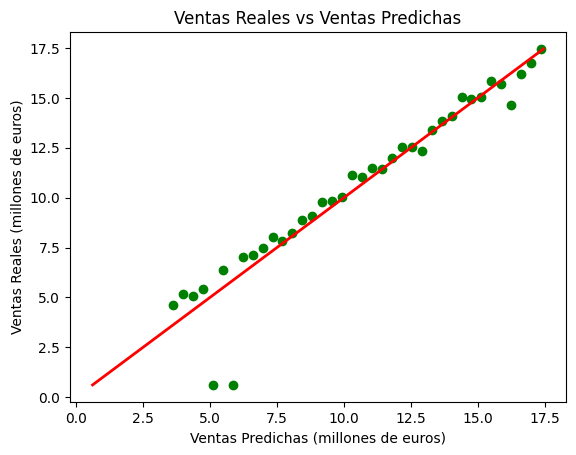

In [ ]:
plt.scatter(predicciones, Y, color='green')
plt.xlabel('Ventas Predichas (millones de euros)')
plt.ylabel('Ventas Reales (millones de euros)')
plt.title('Ventas Reales vs Ventas Predichas')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', lw=2)
plt.show()

Los puntos verdes cercanos a la línea roja indican que las predicciones del modelo son precisas. Cuanto más cerca estén los puntos de la línea roja, mejor es la predicción del modelo, aunque algunos puntos se desvían de dicha línea, lo que indica errores en las predicciones. Sin embargo, la mayoría de los puntos están muy cerca de la línea, lo que sugiere que el modelo predice bastante bien las ventas.
